## Machine Learning using Logistic Regression And Gradient Descent

#### The Data: 
The file LRTrain.csv contains information from 300 images of malignant (i.e. cancerous) and benign (i.e., non-cancerous) breast tissue. The data set describes attributes of the cell nuclei in each image. Each row of the dataset corresponds to one image. For each image, ten different attributes related to the cell nuclei are recorded:

• radius (mean of distances from center to points on the perimeter) • texture (standard deviation of gray-scale values)

• perimeter

• area

• smoothness (local variation in radius lengths)

• compactness (perimeter2 / area - 1.0)

• concavity (severity of concave portions of the contour)

• concave points (number of concave portions of the contour)

• symmetry

• fractal dimension (a measure of how “complex” the perimeter is)

Because each image contains multiple cell nuclei, three quantities are measured for each of the 10 attributes above: the mean, standard error, and worst case value. This results in a total of 30 features for each image. 


<div>
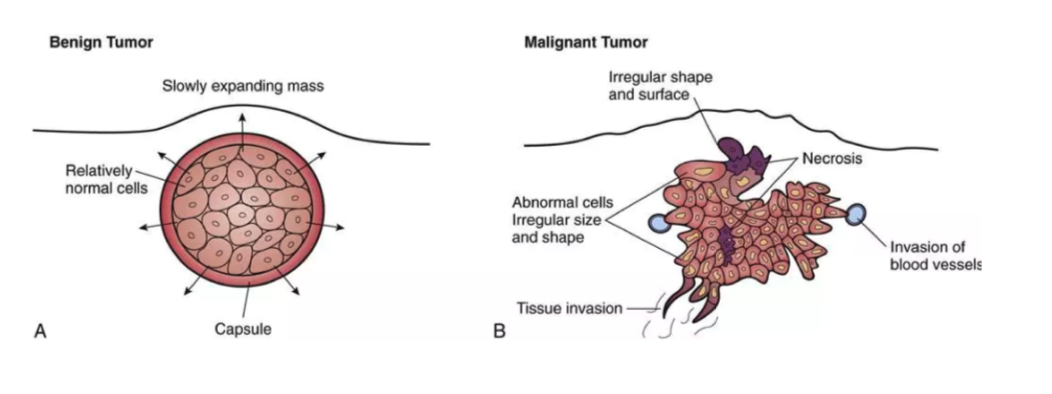
</div>

#### The Goal:  
Our goal is to train a logistic regression classifier using gradient descent, which will then be used to predict whether or not each image was taken from cancerous tissue.

In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import csv
import math
import warnings


In [2]:
# Loading & Processing the training set data
dftrain=pd.read_csv('LRTrain.csv')
dftrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,32.84,84.58,547.8,0.1123,0.08862,0.1145,0.07431,0.2694,0.06878,0
1,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,28.03,113.80,973.1,0.1301,0.32990,0.3630,0.12260,0.3175,0.09772,1
2,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,17.93,114.20,880.8,0.1220,0.20090,0.2151,0.12510,0.3109,0.08187,0
3,14.190,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,0.06433,...,34.85,115.00,811.3,0.1559,0.40590,0.3744,0.17720,0.4724,0.10260,1
4,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,...,26.83,72.22,361.2,0.1559,0.23020,0.2644,0.09749,0.2622,0.08490,0


In [3]:
ytrain = np.asarray(dftrain['diagnosis'])
xtrain=np.asarray(dftrain.drop('diagnosis',axis=1))
row = dftrain.shape[0]
column = dftrain.shape[1]-1

In [4]:
## Define gradient function
def grad(w,x,y):
    g = np.zeros(column)
    for i in range(row):
        g = g + (1/(1+np.exp(np.dot(-w,x[i,:])))-y[i])*x[i,:]
    return (1/row)*g

<div>
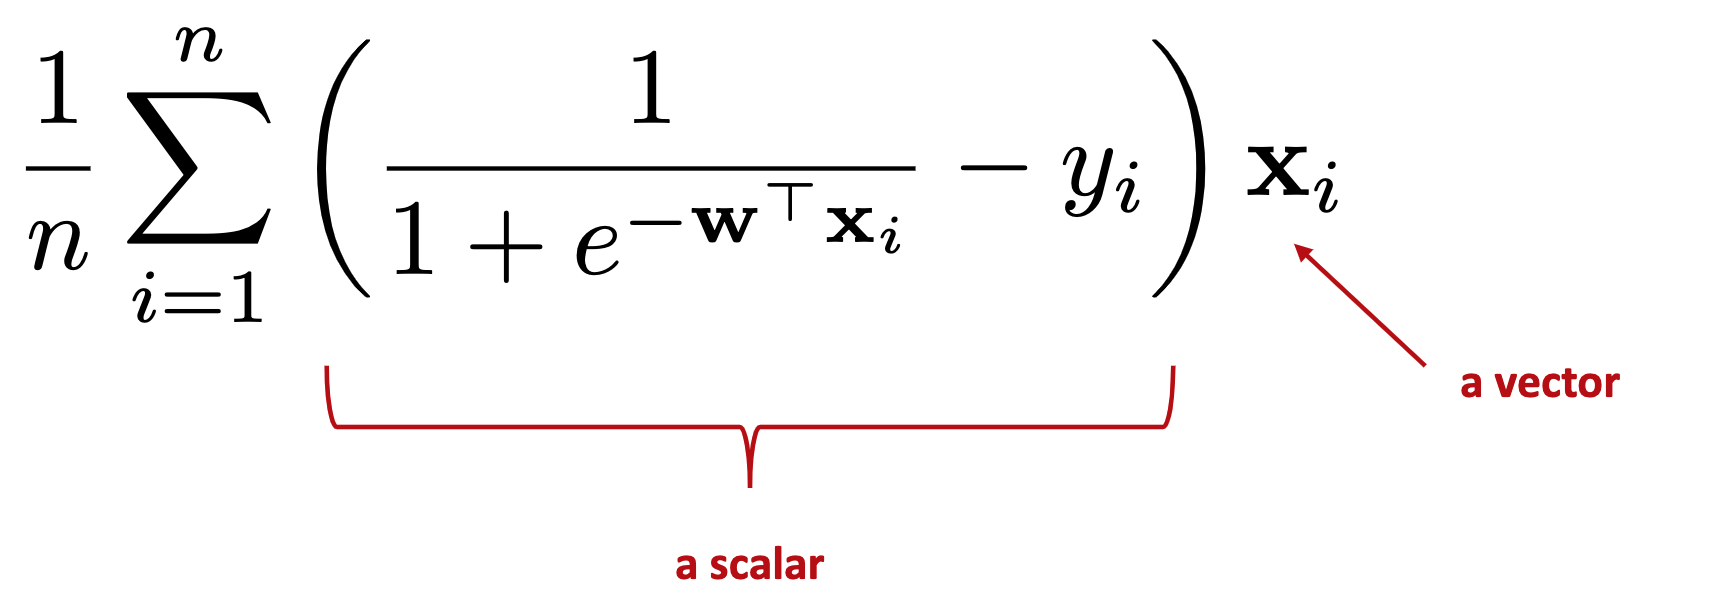
</div>

In [5]:
## Define negative log likelihood function
def fval(w,x,y):
    v = 0;
    for i in range(row):
        v = v + (y[i]*np.log(1+np.exp(-np.dot(w,x[i,:]))) + (1-y[i])*np.log(1+np.exp(np.dot(w,x[i,:]))))
    return (1/row)*v

<div>
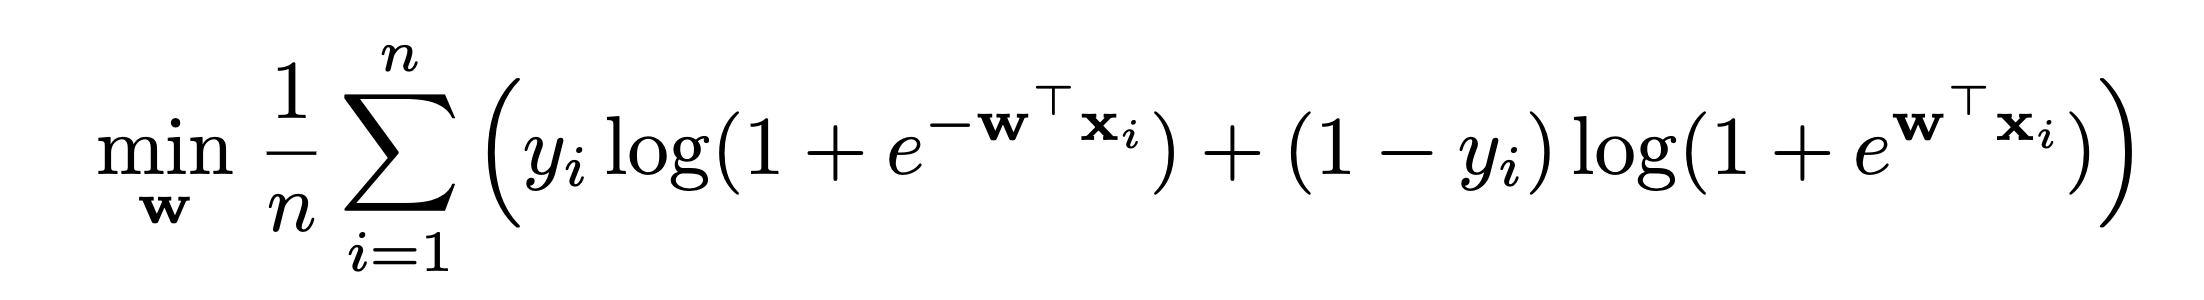
</div>

In [6]:
# initialize weights
w = np.zeros(column)

#### Scenario 1: γ = 0.00001 T = 2000

In [7]:
γ = 0.00001
T = 2000

i = 1
for i in range(T):
    w = w - γ*grad(w,xtrain,ytrain)
    i+=1
fval(w,xtrain,ytrain)

0.2335812896116393

#### Scenario 2: γ = 0.0001 T = 2000

In [8]:
γ = 0.0001
T = 2000

i = 1
for i in range(T):
    w = w - γ*grad(w,xtrain,ytrain)
    i+=1
fval(w,xtrain,ytrain)

0.4461948665683648

#### Scenario 3: γ = 0.00001 T = 3000

In [9]:
γ = 0.00001
T = 3000

i = 1

for i in range(T):
    w = w - γ*grad(w,xtrain,ytrain)
    i+=1
fval(w,xtrain,ytrain)

0.31631396147859625

#### Scenario 3, introducing a termination criterion: γ = 0.00001

In [10]:
γ = 0.00001
error = 0.1

i = 1
while np.linalg.norm(grad(w,xtrain,ytrain)) > error:
    w = w - γ*grad(w,xtrain,ytrain)
fval(w,xtrain,ytrain)

0.1702425612666002

### I tried three different scenario by either changing γ, changing T, and changing termination criterion to minimize the fval that I defined, which is that I got in scenario 3.

### After I trained logistic regression classifier,I defined the function to compute the true positive rate (TPR), false positive rate (FPR), true negative rate (TNR), and false negative rate (FNR) on the test dataset LRTest.csv.  I re-calculated these performance metrics for each value of the threshold parameter t in t ∈ {0, 0.1, . . . , 0.9, 1}.

In [11]:
# Loading & Processing the Testing set data
dftest=pd.read_csv('LRTest.csv')
dftest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,...,16.91,87.38,576.0,0.1142,0.19750,0.14500,0.05850,0.2432,0.10090,0
1,16.24,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,25.09,126.90,1031.0,0.1365,0.47060,0.50260,0.17320,0.2770,0.10630,1
2,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,...,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0
3,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,25.94,97.59,699.4,0.1339,0.17510,0.13810,0.07911,0.2678,0.06603,0
4,10.94,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.02932,0.1486,0.06615,...,25.58,82.76,472.4,0.1363,0.16440,0.14120,0.07887,0.2251,0.07732,0


In [12]:
ytest = np.asarray(dftest['diagnosis'])
xtest=np.asarray(dftest.drop('diagnosis',axis=1))
row_test = dftest.shape[0]
column_test = dftest.shape[1]-1

In [13]:
def pred(w,x,y,t): # defining the formula to calculate tpr, fpr, tnr, fnr
    tp = tn = fn = fp = 0
    yp = np.zeros(row_test)
    for i in range(row_test):
        hold = 1/(1+np.exp(np.dot(-w,x[i,:])))
        if hold > t:
            yp[i] = 1
        else:
            yp[i] = 0
        if yp[i] == y[i]:
            if y[i] == 1:
                tp += 1
            else:
                tn += 1
        else:
            if y[i] == 1:
                fn += 1
            else:
                fp += 1
    tpr = tp / (tp + fn)
    fnr = 1 - tpr
    tnr = tn / (fp + tn)
    fpr = 1 - tnr
    return t, tpr, fpr, tnr, fnr

In [14]:
from prettytable import PrettyTable
a = PrettyTable()

a.field_names = ["t", "TPR", "FPR", "TNR", "FNR"]

In [15]:
t = 0
while t <= 1:
    result = np.asarray(pred(w,xtest,ytest,t))
    t = t + 0.1
    a.add_row(result)

### The Report is in the following table:

In [16]:
print(a)

+---------------------+---------------------+----------------------+--------------------+----------------------+
|          t          |         TPR         |         FPR          |        TNR         |         FNR          |
+---------------------+---------------------+----------------------+--------------------+----------------------+
|         0.0         |         1.0         |         1.0          |        0.0         |         0.0          |
|         0.1         |  0.9897959183673469 | 0.23391812865497075  | 0.7660818713450293 | 0.010204081632653073 |
|         0.2         |  0.9489795918367347 | 0.14619883040935677  | 0.8538011695906432 | 0.05102040816326525  |
| 0.30000000000000004 |  0.9285714285714286 | 0.10526315789473684  | 0.8947368421052632 |  0.0714285714285714  |
|         0.4         |  0.9081632653061225 | 0.052631578947368474 | 0.9473684210526315 | 0.09183673469387754  |
|         0.5         |  0.8979591836734694 | 0.03508771929824561  | 0.9649122807017544 | 0.1020